In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
Qdata = pd.read_csv('QuasarData.txt', sep=' ', header = None, skipinitialspace=True)
Qdata.columns = ['Wavelength','FluxDensity','eFluxD']
print(Qdata)

      Wavelength  FluxDensity  eFluxD
0          800.5        0.149   0.074
1          801.5        0.000   0.260
2          802.5        0.676   0.227
3          803.5        0.000   0.222
4          804.5        0.413   0.159
...          ...          ...     ...
7750      8550.5        0.733   0.056
7751      8551.5        0.723   0.049
7752      8552.5        0.718   0.054
7753      8553.5        0.776   0.046
7754      8554.5        0.792   0.065

[7755 rows x 3 columns]


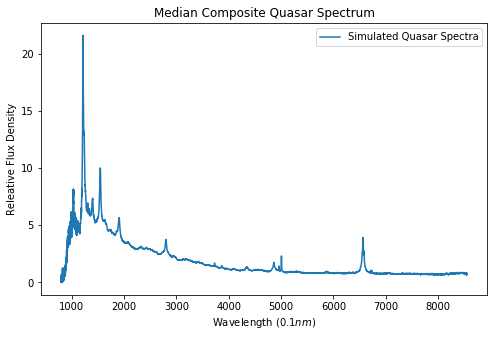

In [31]:
# Problem 1a
# want to plot spectrum of quasar (wavelength vs FluxDensity)
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.plot(Qdata['Wavelength'], Qdata['FluxDensity'], label='Simulated Quasar Spectra')
ax.set_title('Median Composite Quasar Spectrum')
ax.set_xlabel('Wavelength $(0.1nm)$')
ax.set_ylabel('Releative Flux Density')
ax.legend(loc='best')
plt.show()

3000


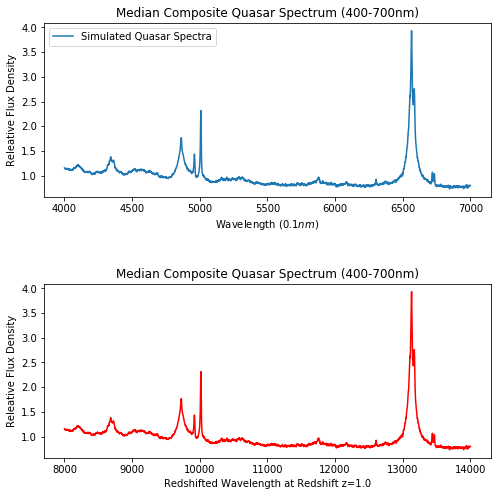

In [80]:
# Problem 1b
# Wavlengths = 400-700   ---- these are any wavelengths in table from 4000-7000

# create function that defines the observed wavelength based on emitted wavelength input at redshift of 0 and new redshift
def redshiftchange(zval, emit):
    observed = (1+zval) * (np.asarray(emit))
    return observed

# plot data only between ((4000 to 7000) * 0.1nm)
QdataRange = []
QfluxRange = []
for ind in Qdata.index:
    if Qdata['Wavelength'][ind] <= 7000 and Qdata['Wavelength'][ind] >= 4000:
        QdataRange.append(Qdata['Wavelength'][ind])
        QfluxRange.append(Qdata['FluxDensity'][ind])
print(len(QdataRange)) # should be 3000 rows

fig, ax = plt.subplots(2,1, figsize=(8,8))
ax0 = ax[0].plot(QdataRange, QfluxRange, label='Simulated Quasar Spectra')
ax[0].set_title('Median Composite Quasar Spectrum (400-700nm)')
ax[0].set_xlabel('Wavelength $(0.1nm)$')
ax[0].set_ylabel('Releative Flux Density')
ax[0].legend(loc='best')

# plot at varying redshifts
z = 1.0 # set redshift to plot wavelengths observed at that redshift
RedshiftData = redshiftchange(z,QdataRange)
ax1 = ax[1].plot(RedshiftData, QfluxRange, label=f'Simulated Quasar Spectra at Redshift z={z}', c='r')
ax[1].set_title('Median Composite Quasar Spectrum (400-700nm)')
ax[1].set_xlabel(f'Redshifted Wavelength at Redshift z={z}')
ax[1].set_ylabel('Releative Flux Density')
fig.subplots_adjust(hspace=0.5)
plt.show()